In [15]:
import fastf1 as ff1
from fastf1 import plotting
import pandas as pd
import matplotlib.pyplot as plt
import pytz
from datetime import datetime

ff1.plotting.setup_mpl()

# ff1.Cache.enable_cache('cache')



In [56]:
race = ff1.get_events_remaining(backend='fastf1')
race



,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session1DateUtc,...,Session3,Session3Date,Session3DateUtc,Session4,Session4Date,Session4DateUtc,Session5,Session5Date,Session5DateUtc,F1ApiSupport
13,13,Hungary,Budapest,FORMULA 1 HUNGARIAN GRAND PRIX 2024,2024-07-21,Hungarian Grand Prix,conventional,Practice 1,2024-07-19 13:30:00+02:00,2024-07-19 11:30:00,...,Practice 3,2024-07-20 12:30:00+02:00,2024-07-20 10:30:00,Qualifying,2024-07-20 16:00:00+02:00,2024-07-20 14:00:00,Race,2024-07-21 15:00:00+02:00,2024-07-21 13:00:00,True
14,14,Belgium,Spa-Francorchamps,FORMULA 1 ROLEX BELGIAN GRAND PRIX 2024,2024-07-28,Belgian Grand Prix,conventional,Practice 1,2024-07-26 13:30:00+02:00,2024-07-26 11:30:00,...,Practice 3,2024-07-27 12:30:00+02:00,2024-07-27 10:30:00,Qualifying,2024-07-27 16:00:00+02:00,2024-07-27 14:00:00,Race,2024-07-28 15:00:00+02:00,2024-07-28 13:00:00,True
15,15,Netherlands,Zandvoort,FORMULA 1 HEINEKEN DUTCH GRAND PRIX 2024,2024-08-25,Dutch Grand Prix,conventional,Practice 1,2024-08-23 12:30:00+02:00,2024-08-23 10:30:00,...,Practice 3,2024-08-24 11:30:00+02:00,2024-08-24 09:30:00,Qualifying,2024-08-24 15:00:00+02:00,2024-08-24 13:00:00,Race,2024-08-25 15:00:00+02:00,2024-08-25 13:00:00,True
16,16,Italy,Monza,FORMULA 1 PIRELLI GRAN PREMIO D’ITALIA 2024,2024-09-01,Italian Grand Prix,conventional,Practice 1,2024-08-30 13:30:00+02:00,2024-08-30 11:30:00,...,Practice 3,2024-08-31 12:30:00+02:00,2024-08-31 10:30:00,Qualifying,2024-08-31 16:00:00+02:00,2024-08-31 14:00:00,Race,2024-09-01 15:00:00+02:00,2024-09-01 13:00:00,True
17,17,Azerbaijan,Baku,FORMULA 1 QATAR AIRWAYS AZERBAIJAN GRAND PRIX ...,2024-09-15,Azerbaijan Grand Prix,conventional,Practice 1,2024-09-13 13:30:00+04:00,2024-09-13 09:30:00,...,Practice 3,2024-09-14 12:30:00+04:00,2024-09-14 08:30:00,Qualifying,2024-09-14 16:00:00+04:00,2024-09-14 12:00:00,Race,2024-09-15 15:00:00+04:00,2024-09-15 11:00:00,True
18,18,Singapore,Marina Bay,FORMULA 1 SINGAPORE AIRLINES SINGAPORE GRAND P...,2024-09-22,Singapore Grand Prix,conventional,Practice 1,2024-09-20 17:30:00+08:00,2024-09-20 09:30:00,...,Practice 3,2024-09-21 17:30:00+08:00,2024-09-21 09:30:00,Qualifying,2024-09-21 21:00:00+08:00,2024-09-21 13:00:00,Race,2024-09-22 20:00:00+08:00,2024-09-22 12:00:00,True
19,19,United States,Austin,FORMULA 1 PIRELLI UNITED STATES GRAND PRIX 2024,2024-10-20,United States Grand Prix,sprint_qualifying,Practice 1,2024-10-18 12:30:00-05:00,2024-10-18 17:30:00,...,Sprint,2024-10-19 13:00:00-05:00,2024-10-19 18:00:00,Qualifying,2024-10-19 17:00:00-05:00,2024-10-19 22:00:00,Race,2024-10-20 14:00:00-05:00,2024-10-20 19:00:00,True
20,20,Mexico,Mexico City,FORMULA 1 GRAN PREMIO DE LA CIUDAD DE MÉXICO 2024,2024-10-27,Mexico City Grand Prix,conventional,Practice 1,2024-10-25 12:30:00-06:00,2024-10-25 18:30:00,...,Practice 3,2024-10-26 11:30:00-06:00,2024-10-26 17:30:00,Qualifying,2024-10-26 15:00:00-06:00,2024-10-26 21:00:00,Race,2024-10-27 14:00:00-06:00,2024-10-27 20:00:00,True
21,21,Brazil,São Paulo,FORMULA 1 LENOVO GRANDE PRÊMIO DE SÃO PAULO 2024,2024-11-03,São Paulo Grand Prix,sprint_qualifying,Practice 1,2024-11-01 11:30:00-03:00,2024-11-01 14:30:00,...,Sprint,2024-11-02 11:00:00-03:00,2024-11-02 14:00:00,Qualifying,2024-11-02 15:00:00-03:00,2024-11-02 18:00:00,Race,2024-11-03 14:00:00-03:00,2024-11-03 17:00:00,True
22,22,United States,Las Vegas,FORMULA 1 HEINEKEN SILVER LAS VEGAS GRAND PRIX...,2024-11-23,Las Vegas Grand Prix,conventional,Practice 1,2024-11-21 18:30:00-08:00,2024-11-22 02:30:00,...,Practice 3,2024-11-22 18:30:00-08:00,2024-11-23 02:30:00,Qualifying,2024-11-22 22:00:00-08:00,2024-11-23 06:00:00,Race,2024-11-23 22:00:00-08:00,2024-11-24 06:00:00,True


In [45]:
race = ff1.get_events_remaining(backend='fastf1')
next_race_sessions = race[["EventName", "Session1", "Session1DateUtc", "Session2", "Session2DateUtc", "Session3", "Session3DateUtc", "Session4", "Session4DateUtc", "Session5", "Session5DateUtc"]].iloc[0]
next_race_sessions = pd.DataFrame(next_race_sessions)

brt = pytz.timezone('America/Sao_Paulo')

def process_datetime_columns(df, timezone='UTC'):
    for column in df.columns:
        if column != "EventName":
            df[column] = pd.to_datetime(df[column], errors='coerce')
            if df[column].dt.tz is None:
                df[column] = df[column].dt.tz_localize(timezone)
            df[column] = df[column].dt.tz_convert(brt)
    return df

next_race_sessions = process_datetime_columns(next_race_sessions)

next_race_sessions



C:\Users\Caio\AppData\Local\Temp\ipykernel_12752\3001770933.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column] = pd.to_datetime(df[column], errors='coerce')


,13
EventName,NaT
Session1DateUtc,2024-07-19 08:30:00-03:00
Session2DateUtc,2024-07-19 12:00:00-03:00
Session3DateUtc,2024-07-20 07:30:00-03:00
Session4DateUtc,2024-07-20 11:00:00-03:00
Session5DateUtc,2024-07-21 10:00:00-03:00


In [62]:
def get_and_process_next_race_sessions(backend='fastf1', timezone='UTC', target_timezone='America/Sao_Paulo'):

    race = ff1.get_events_remaining(backend=backend)
    
    next_race_sessions = race[["EventName", "Session1", "Session1DateUtc", "Session2", "Session2DateUtc", "Session3", "Session3DateUtc", "Session4", "Session4DateUtc", "Session5", "Session5DateUtc"]].iloc[0]
    next_race_sessions = pd.DataFrame([next_race_sessions])
    columns_to_exclude = ["EventName", "Session1", "Session2", "Session3", "Session4", "Session5"]
    
    brt = pytz.timezone(target_timezone)

    def process_datetime_columns(df, timezone='UTC'):
        df_processed = df.copy()
        
        for column in df_processed.columns:
            if column not in columns_to_exclude:
                df_processed[column] = pd.to_datetime(df_processed[column], errors='coerce')
                df_processed[column] = df_processed[column].fillna(df[column])
                if df_processed[column].dt.tz is None:
                    df_processed[column] = df_processed[column].dt.tz_localize(timezone)
                df_processed[column] = df_processed[column].dt.tz_convert(brt)
        
        return df_processed

    next_race_sessions_df = process_datetime_columns(next_race_sessions)

    return next_race_sessions_df

next_race_sessions_df = get_and_process_next_race_sessions()
next_race_sessions_df

,EventName,Session1,Session1DateUtc,Session2,Session2DateUtc,Session3,Session3DateUtc,Session4,Session4DateUtc,Session5,Session5DateUtc
13,Hungarian Grand Prix,Practice 1,2024-07-19 08:30:00-03:00,Practice 2,2024-07-19 12:00:00-03:00,Practice 3,2024-07-20 07:30:00-03:00,Qualifying,2024-07-20 11:00:00-03:00,Race,2024-07-21 10:00:00-03:00


In [83]:
for column in next_race_sessions_df.columns:
    if column != "EventName":
        if pd.api.types.is_datetime64_any_dtype(next_race_sessions_df[column]):
            data_column = next_race_sessions_df[column]
            day = data_column.dt.day
            month = data_column.dt.month
            year = data_column.dt.year
            hour = data_column.dt.hour
            minute = data_column.dt.minute

            d = day.iloc[0]
            m = month.iloc[0]
            y = year.iloc[0]
            h = hour.iloc[0]
            min = minute.iloc[0]
            formatted_time = f"{h:02}:{min:02}"

            session_name = next_race_sessions_df[column.replace('DateUtc', '')].iloc[0]

            print(f"{session_name} - {d}/{m}/{y} - {formatted_time}")


Practice 1 - 19/7/2024 - 08:30
Practice 2 - 19/7/2024 - 12:00
Practice 3 - 20/7/2024 - 07:30
Qualifying - 20/7/2024 - 11:00
Race - 21/7/2024 - 10:00


In [68]:
next_race_sessions_df["Session1"]

13    Practice 1
Name: Session1, dtype: object

In [41]:
# next_race["Session1Date"] = pd.to_datetime(race['Session1Date'])
next_race["Session1DateUtc"] = pd.to_datetime(race['Session1DateUtc'])

next_race["Session1DateUtc"] = next_race["Session1DateUtc"].dt.tz_localize('UTC')

brt = pytz.timezone('America/Sao_Paulo')

next_race["Session1DateBRT"] = next_race["Session1DateUtc"].dt.tz_convert(brt)
#next_race["Session1DateUtcBRT"] = next_race["Session1DateUtc"].dt.tz_convert(brt)

next_race

,Session1,Session1Date,Session1DateUtc,Session1DateBRT
13,Practice 1,2024-07-19 13:30:00+02:00,2024-07-19 11:30:00+00:00,2024-07-19 08:30:00-03:00
14,Practice 1,2024-07-26 13:30:00+02:00,2024-07-26 11:30:00+00:00,2024-07-26 08:30:00-03:00


In [16]:
next_race = race[["Session1", "Session1Date", "Session1DateUtc"]].iloc[0:2]
next_race

,Session1,Session1Date,Session1DateUtc
13,Practice 1,2024-07-19 13:30:00+02:00,2024-07-19 11:30:00
14,Practice 1,2024-07-26 13:30:00+02:00,2024-07-26 11:30:00


In [24]:
# next_race["Session1Date"] = pd.to_datetime(race['Session1Date'])
next_race["Session1DateUtc"] = pd.to_datetime(race['Session1DateUtc'])

next_race["Session1DateUtc"] = next_race["Session1DateUtc"].dt.tz_localize('UTC')

brt = pytz.timezone('America/Sao_Paulo')

next_race["Session1DateBRT"] = next_race["Session1DateUtc"].dt.tz_convert(brt)
#next_race["Session1DateUtcBRT"] = next_race["Session1DateUtc"].dt.tz_convert(brt)

next_race

,Session1,Session1Date,Session1DateUtc,Session1DateBRT
13,Practice 1,2024-07-19 13:30:00+02:00,2024-07-19 11:30:00+00:00,2024-07-19 08:30:00-03:00
14,Practice 1,2024-07-26 13:30:00+02:00,2024-07-26 11:30:00+00:00,2024-07-26 08:30:00-03:00


In [32]:
next_race["Session1DateBRT"].dt.year
next_race["Session1DateBRT"].dt.month
next_race["Session1DateBRT"].dt.day
next_race["Session1DateBRT"].dt.hour
next_race["Session1DateBRT"].dt.minute

13    30
14    30
Name: Session1DateBRT, dtype: int32

In [6]:
next = ff1.get_session(2024, f"{next_race}", "R")
next.load()

core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.3.9]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!


KeyError: 'DriverNumber'

In [25]:
df_ham1 = race.laps.pick_driver('Lewis Hamilton').pick_lap(3).get_car_data().add_distance()
df_ham2 = race.laps.pick_driver('HAM').pick_lap(2).get_car_data().add_distance()
fig, ax = plt.subplots()
ax.plot(df_ham1['Distance'], df_ham1['Speed'], label='HAM')
ax.plot(df_ham2['Distance'], df_ham2['Speed'], label='HAM')

ValueError: Cannot slice telemetry because self contains no driver number!

In [32]:
dir(race.laps.pick_driver('HAM'))

['Compound',
 'Deleted',
 'DeletedReason',
 'Driver',
 'DriverNumber',
 'FastF1Generated',
 'FreshTyre',
 'IsAccurate',
 'IsPersonalBest',
 'LapNumber',
 'LapStartDate',
 'LapStartTime',
 'LapTime',
 'PitInTime',
 'PitOutTime',
 'Position',
 'QUICKLAP_THRESHOLD',
 'Sector1SessionTime',
 'Sector1Time',
 'Sector2SessionTime',
 'Sector2Time',
 'Sector3SessionTime',
 'Sector3Time',
 'SpeedFL',
 'SpeedI1',
 'SpeedI2',
 'SpeedST',
 'Stint',
 'T',
 'Team',
 'Time',
 'TrackStatus',
 'TyreLife',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_COL_TYPES',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__arrow_c_stream__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__dataframe_consortium_standard__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__

In [54]:
race = ff1.get_session(2023, "Mexico City Grand Prix", "R")
race.load()

race.laps.pick_driver("MAG").pick_lap(32).get_car_data()

core           INFO 	Loading data for Mexico City Grand Prix - Race [v3.3.9]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '16', '55', '4', '63', '3', '81', '23', '31', '10', '22', '27', '24', '77', '2', '18', '14', '20', '11']


,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime
0,2023-10-29 20:48:04.779,11751,250,6,100,False,0,car,0 days 00:00:00.152000,0 days 01:47:04.698000
1,2023-10-29 20:48:04.979,11782,260,6,100,False,0,car,0 days 00:00:00.352000,0 days 01:47:04.898000
2,2023-10-29 20:48:05.339,10752,266,7,100,False,0,car,0 days 00:00:00.712000,0 days 01:47:05.258000
3,2023-10-29 20:48:05.499,10805,267,7,100,False,0,car,0 days 00:00:00.872000,0 days 01:47:05.418000
4,2023-10-29 20:48:05.699,10950,269,7,100,False,0,car,0 days 00:00:01.072000,0 days 01:47:05.618000
...,...,...,...,...,...,...,...,...,...,...
848,2023-10-29 20:51:51.660,0,0,6,0,False,1,car,0 days 00:03:47.033000,0 days 01:50:51.579000
849,2023-10-29 20:51:51.900,0,0,6,0,False,1,car,0 days 00:03:47.273000,0 days 01:50:51.819000
850,2023-10-29 20:51:52.140,0,0,6,0,False,1,car,0 days 00:03:47.513000,0 days 01:50:52.059000
851,2023-10-29 20:51:52.300,0,0,6,0,False,1,car,0 days 00:03:47.673000,0 days 01:50:52.219000


In [73]:
year = 2024

#schedule = ff1.get_event_schedule(year)["EventName"][1:].unique()
schedule = ff1.get_event_schedule(year)["EventName"].unique()
# schedule
event_name = []

for event in schedule:
     event_name.append(event)

event_name


['Pre-Season Testing',
 'Bahrain Grand Prix',
 'Saudi Arabian Grand Prix',
 'Australian Grand Prix',
 'Japanese Grand Prix',
 'Chinese Grand Prix',
 'Miami Grand Prix',
 'Emilia Romagna Grand Prix',
 'Monaco Grand Prix',
 'Canadian Grand Prix',
 'Spanish Grand Prix',
 'Austrian Grand Prix',
 'British Grand Prix',
 'Hungarian Grand Prix',
 'Belgian Grand Prix',
 'Dutch Grand Prix',
 'Italian Grand Prix',
 'Azerbaijan Grand Prix',
 'Singapore Grand Prix',
 'United States Grand Prix',
 'Mexico City Grand Prix',
 'São Paulo Grand Prix',
 'Las Vegas Grand Prix',
 'Qatar Grand Prix',
 'Abu Dhabi Grand Prix']

In [72]:
drivers = race._drivers_from_f1_api()['FullName'].unique()

drivers_name = []
for driver in drivers:
    drivers_name.append(driver.title())

drivers_name

req            INFO 	Using cached data for driver_info


['Lewis Hamilton',
 'Valtteri Bottas',
 'Max Verstappen',
 'Charles Leclerc',
 'Lando Norris',
 'Lance Stroll',
 'Carlos Sainz',
 'Daniel Ricciardo',
 'Esteban Ocon',
 'Sebastian Vettel',
 'Pierre Gasly',
 'Alexander Albon',
 'Nico Hulkenberg',
 'Kevin Magnussen',
 'Antonio Giovinazzi',
 'Kimi Räikkönen',
 'Romain Grosjean',
 'Nicholas Latifi',
 'Daniil Kvyat',
 'George Russell']

In [1]:
def race_results():
    race = ff1.get_session(2021, "Yas Marina", "R")
    race.load()
    laps = race.laps
    df_race = race.results
    return df_race

In [2]:
race = ff1.get_session(2021, "Yas Marina", 'R')
quali = ff1.get_session(2021, "Yas Marina", 'Q')


req         WARNING 	DEFAULT CACHE ENABLED! (349.8 MB) C:\Users\Caio\AppData\Local\Temp\fastf1


In [3]:
race.load()
laps = race.laps

core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v3.3.9]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 9
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 9)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '55', '22', '10',

In [4]:
race.results

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
33,33,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,0600EF,red_bull,Max,Verstappen,Max Verstappen,...,,1.0,1,1.0,NaT,NaT,NaT,0 days 01:30:17.345000,Finished,26.0
44,44,L HAMILTON,HAM,hamilton,Mercedes,00D2BE,mercedes,Lewis,Hamilton,Lewis Hamilton,...,,2.0,2,2.0,NaT,NaT,NaT,0 days 00:00:02.256000,Finished,18.0
55,55,C SAINZ,SAI,sainz,Ferrari,DC0004,ferrari,Carlos,Sainz,Carlos Sainz,...,,3.0,3,5.0,NaT,NaT,NaT,0 days 00:00:05.173000,Finished,15.0
22,22,Y TSUNODA,TSU,tsunoda,AlphaTauri,2B4562,alphatauri,Yuki,Tsunoda,Yuki Tsunoda,...,,4.0,4,8.0,NaT,NaT,NaT,0 days 00:00:05.692000,Finished,12.0
10,10,P GASLY,GAS,gasly,AlphaTauri,2B4562,alphatauri,Pierre,Gasly,Pierre Gasly,...,,5.0,5,12.0,NaT,NaT,NaT,0 days 00:00:06.531000,Finished,10.0
77,77,V BOTTAS,BOT,bottas,Mercedes,00D2BE,mercedes,Valtteri,Bottas,Valtteri Bottas,...,,6.0,6,6.0,NaT,NaT,NaT,0 days 00:00:07.463000,Finished,8.0
4,4,L NORRIS,NOR,norris,McLaren,FF9800,mclaren,Lando,Norris,Lando Norris,...,,7.0,7,3.0,NaT,NaT,NaT,0 days 00:00:59.200000,Finished,6.0
14,14,F ALONSO,ALO,alonso,Alpine,0090FF,alpine,Fernando,Alonso,Fernando Alonso,...,,8.0,8,11.0,NaT,NaT,NaT,0 days 00:01:01.708000,Finished,4.0
31,31,E OCON,OCO,ocon,Alpine,0090FF,alpine,Esteban,Ocon,Esteban Ocon,...,,9.0,9,9.0,NaT,NaT,NaT,0 days 00:01:04.026000,Finished,2.0
16,16,C LECLERC,LEC,leclerc,Ferrari,DC0004,ferrari,Charles,Leclerc,Charles Leclerc,...,,10.0,10,7.0,NaT,NaT,NaT,0 days 00:01:06.057000,Finished,1.0


In [5]:
fastet_lap = laps.pick_fastest()
print(f'Fastest lap: ', fastet_lap['LapTime'])
print(f'Compound: ', fastet_lap['Compound'])
print(f'Driver: ', fastet_lap['Driver'])

Fastest lap:  0 days 00:01:26.103000
Compound:  HARD
Driver:  VER


In [6]:
laps_driver1 = laps.pick_driver('HAM')
laps_driver2 = laps.pick_driver('VER')

In [7]:
print(laps_driver1['LapNumber'].max())
print(laps_driver2['LapNumber'].max())

58.0
58.0


In [8]:
rbr_color = ff1.plotting.team_color('RBR')
mer_color = ff1.plotting.team_color('MER')

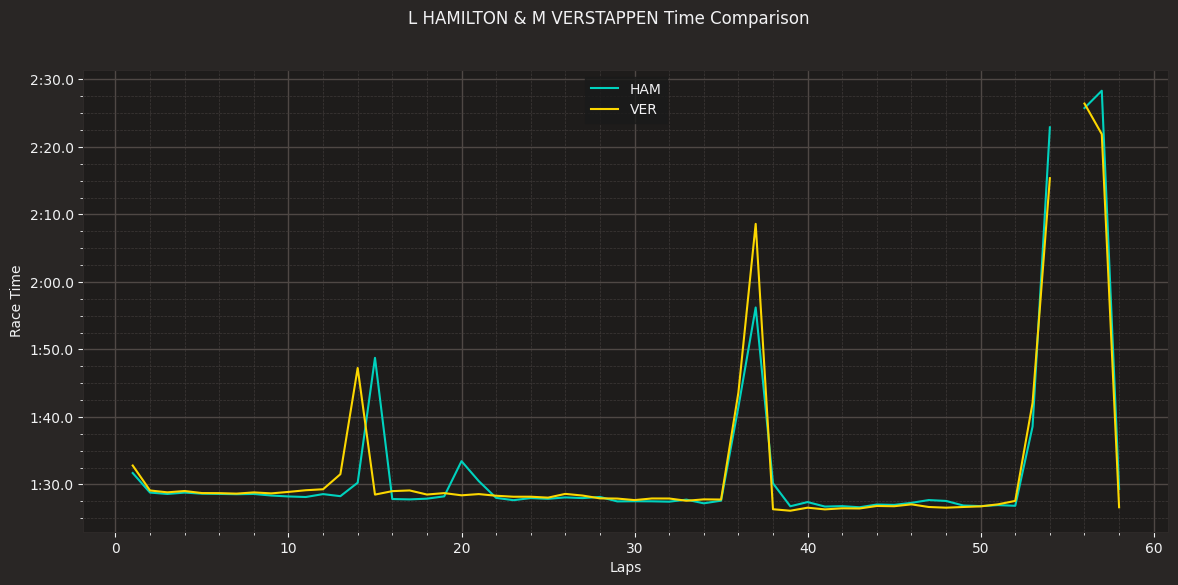

In [9]:
plt.rcParams['figure.figsize'] = [14, 6]
fig, ax = plt.subplots()
fig.suptitle(race.get_driver('HAM').BroadcastName + " & " + race.get_driver('VER').BroadcastName + " Time Comparison")

ax.plot(laps_driver1['LapNumber'], laps_driver1['LapTime'], label='HAM', color=mer_color)
ax.plot(laps_driver2['LapNumber'], laps_driver2['LapTime'], label='VER', color=rbr_color)
ax.set(ylabel='Race Time', xlabel='Laps')
ax.legend(loc='upper center')
plt.show()

In [10]:
ver_lap = laps.pick_driver('VER')
ham_lap = laps.pick_driver('HAM')

ver_lastlap = ver_lap[ver_lap.LapNumber==58]
ham_lastlap = ham_lap[ham_lap.LapNumber==58]

print(f'''Hamilton's lap time on the last lap. ''', ham_lastlap.LapTime)
print(f'''Verstappen's lap time on the last lap''', ver_lastlap.LapTime)

Hamilton's lap time on the last lap.  632   0 days 00:01:29.330000
Name: LapTime, dtype: timedelta64[ns]
Verstappen's lap time on the last lap 516   0 days 00:01:26.618000
Name: LapTime, dtype: timedelta64[ns]


In [11]:
ver_tel = ver_lastlap.get_car_data().add_distance()
ham_tel = ham_lastlap.get_car_data().add_distance()

In [ ]:
def ham_tel():
    race = ff1.get_session(2021, "Yas Marina", "R")
    race.load()
    laps = race.laps
    ham_lap = laps.pick_driver('HAM')
    ham_lastlap = ham_lap[ham_lap.LapNumber == 58]
    ham_tel = ham_lastlap.get_car_data().add_distance()
    return ham_tel


In [ ]:
def ver_tel():
    race = ff1.get_session(2021, "Yas Marina", "R")
    race.load()
    laps = race.laps
    ver_lap = laps.pick_driver('HAM')
    ver_lastlap = ver_lap[ver_lap.LapNumber == 58]
    ver_tel = ver_lastlap.get_car_data().add_distance()
    return ver_tel
    

In [4]:
# def plotar_grafico():
#     race = ff1.get_session(2021, "Yas Marina", "R")
#     race.load()
#     laps = race.laps
#     ver_lap = laps.pick_driver('HAM')
#     ver_lastlap = ver_lap[ver_lap.LapNumber == 58]
#     ver_tel = ver_lastlap.get_car_data().add_distance()
#     ham_lap = laps.pick_driver('HAM')
#     ham_lastlap = ham_lap[ham_lap.LapNumber == 58]
#     ham_tel = ham_lastlap.get_car_data().add_distance()

#     rbr_color = ff1.plotting.team_color('RBR')
#     mer_color = ff1.plotting.team_color('MER')

#     plt.rcParams['figure.figsize'] = [16,8]
#     fig, ax = plt.subplots(3)

#     fig.suptitle('Comparison of Telemetry from the Last Lap')

#     ax[0].plot(ver_tel['Distance'], ver_tel['Speed'], label='VER', color=rbr_color)
#     ax[0].plot(ham_tel['Distance'], ham_tel['Speed'], label='HAM', color=mer_color)
#     ax[0].set_xlabel('Distance in M')
#     ax[0].set_ylabel('Speed in KM/H')
#     ax[0].legend()

#     ax[1].plot(ver_tel['Distance'], ver_tel['Brake'], label='VER', color=rbr_color)
#     ax[1].plot(ham_tel['Distance'], ham_tel['Brake'], label='HAM', color=mer_color)
#     ax[1].set_xlabel('Distance in M')
#     ax[1].set_ylabel('Brake')

#     ax[2].plot(ver_tel['Distance'], ver_tel['Throttle'], label='VER', color=rbr_color)
#     ax[2].plot(ham_tel['Distance'], ham_tel['Throttle'], label='HAM', color=mer_color)
#     ax[2].set_xlabel('Distance in M')
#     ax[2].set_ylabel('Throttle')

#     plt.suptitle(f"""
#         Comparison of Telemetry from the Last Lap
#         {race.event['EventName']} {race.event['EventDate']} Race
#     """)

#     return fig

# fig

NameError: name 'fig' is not defined

In [11]:
def plotar_grafico():
    race = ff1.get_session(2021, "Yas Marina", "R")
    race.load()
    laps = race.laps

    ver_lap = laps.pick_driver('VER')
    ver_lastlap = ver_lap[ver_lap.LapNumber == 58]
    ver_tel = ver_lastlap.get_car_data().add_distance()
    ver_tel_speed = ver_tel[["Distance", "Speed"]]
        
    ham_lap = laps.pick_driver('HAM')
    ham_lastlap = ham_lap[ham_lap.LapNumber == 58]
    ham_tel = ham_lastlap.get_car_data().add_distance()
    ham_tel_speed = ham_tel[["Distance", "Speed"]]

    return ver_tel_speed, ham_tel_speed
    # rbr_color = ff1.plotting.team_color('RBR')
    # mer_color = ff1.plotting.team_color('MER')

    # plt.rcParams['figure.figsize'] = [16,8]
    # fig, ax = plt.subplots()

    # fig.suptitle('Comparison of Telemetry from the Last Lap')

    # ax.plot(ver_tel['Distance'], ver_tel['Speed'], label='VER', color=rbr_color)
    # ax.plot(ham_tel['Distance'], ham_tel['Speed'], label='HAM', color=mer_color)
    # ax.set_xlabel('Distance in M')
    # ax.set_ylabel('Speed in KM/H')
    # ax.legend()

    # return fig


req         WARNING 	DEFAULT CACHE ENABLED! (349.8 MB) C:\Users\Caio\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v3.3.9]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 9
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 9)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_mes

,Distance,Speed_x,Speed_y
0,0.316667,NaN,228.0
1,1.533333,230.0,NaN
2,13.325833,NaN,233.0
3,17.200000,235.0,NaN
4,29.325833,NaN,240.0
